In [4]:
import torch
from torch import nn
from sklearn.metrics import ConfusionMatrixDisplay
from lib.utils import *
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

class MLP(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.c1 = nn.Conv1d(1, 16, kernel_size=100, stride=10, padding=1)
        self.c2 = nn.Conv1d(16, 8, kernel_size=100, stride=10, padding=1)
        self.fc2 = nn.Linear(56, 3)

    def forward(self,x):
        x = self.c1(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool1d(x, kernel_size=2)
        x = self.c2(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool1d(x, kernel_size=2)
        x = x.view(-1, 56)
        x = self.fc2(x)
        
        return x
model = torch.load(f='model.pt').cpu()

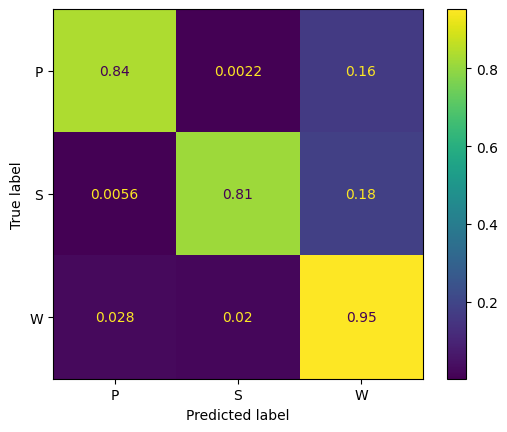

In [27]:
X,y = load_raw_list([20])
X = X.reshape(-1,1,5000)

y_pred_logits = model(X)
sm = nn.Softmax(dim=1)
y_pred = sm(y_pred_logits).argmax(axis=1)
cm = ConfusionMatrixDisplay(confusion_matrix(y.squeeze(),y_pred.cpu(),normalize='true'),display_labels=['P','S','W'])
cm.plot()

In [4]:
torch.cuda.empty_cache()